In [1]:
import sys
sys.path.insert(1, '../..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
# CountUMIPairs(R1_file, R2_file, barcodes, arm_find_seq, UMI_len)

H4_bc = "TGTATCAGTT"
H3K4me3_bc = "GTAGTGGCAT"
H3K27ac_bc = "GTTATTAGGC"
H3K27me3_bc = "TAACATGCGG"
EZH2_bc = "TGGCTAATGT"
EGFR_bc = "TGACCTTATG"
HAtag_bc = "GATTGTCCGC"
H3K27M_bc = "CACGATTGTT"
AEBP2_bc = "TTGCATGGTA"
EED_bc = "TTGAGTAACC"
SUZ12_bc = "TGAGTCGATT"
MED12_bc = "CTATGTTGGT"
CycC_bc = "GAGGATAAGT"

All12_pool = [
    H3K4me3_bc, 
    H3K27ac_bc, 
    H3K27me3_bc, EZH2_bc, EED_bc, SUZ12_bc, AEBP2_bc, 
    MED12_bc, CycC_bc, 
    H3K27M_bc,
    EGFR_bc, HAtag_bc
]

bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

XmnI_midseq = "TAGAGAAG"

In [ ]:
PRC2K4K27_dir = "/path/to/mixing/fastq/"
PRC2K4K27_cnts, PRC2K4K27_QC = CountUMIPairs(PRC2K4K27_dir + "Name_of_R1.fastq.gz",
                                   PRC2K4K27_dir + "Name_of_R2.fastq.gz",
                                   All12_pool, XmnI_midseq, 15)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

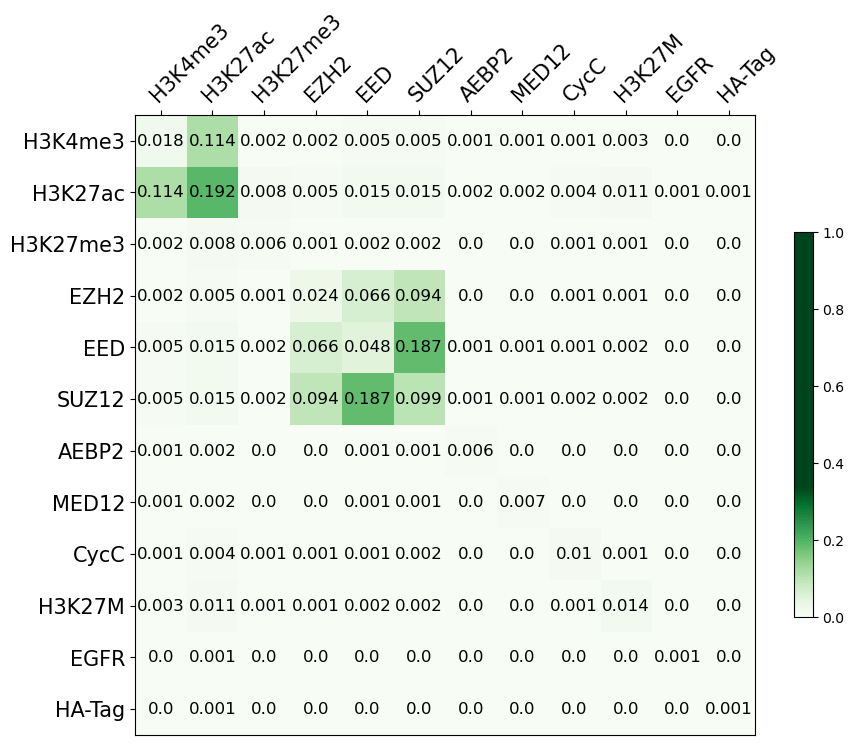

In [4]:
color_thres_num = 88
colors1 = plt.cm.Greens(np.linspace(0, 1, color_thres_num))
colors2 = plt.cm.Greens(np.linspace(1, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = plt.subplots(figsize = (10, 10))

PRC2K4K27_tot_sum = 0
for i in range(len(bc_nms)):
    for j in range(i, len(bc_nms)):
        PRC2K4K27_tot_sum += PRC2K4K27_cnts[i][j]

PRC2K4K27_props = np.zeros((len(bc_nms), len(bc_nms)))
for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        PRC2K4K27_props[i][j] = PRC2K4K27_cnts[i][j] / PRC2K4K27_tot_sum

im = ax.imshow(PRC2K4K27_props, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms)
ax.set_yticklabels(bc_nms)
ax.tick_params(axis='both', labelsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        curr_val = round((PRC2K4K27_cnts[i][j]) / PRC2K4K27_tot_sum, 3)
        if (curr_val < 0.2):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("recombmixing_heatmap.svg", dpi = 1200)